In [32]:
#import packages
import os
import pandas as pd
import numpy as np
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf

current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('updatedchoicedata.csv')
selfreportdata = pd.read_csv('%s/scoring/selfreportdata_master.csv'%(current_dir))

In [33]:
#indexing data frame to isolate variables by condition
neutralcondition = updatedchoicedata[updatedchoicedata['condition'] == 0].reset_index()
rejectioncondition = updatedchoicedata[updatedchoicedata['condition'] == 1].reset_index()
acceptcondition = updatedchoicedata[updatedchoicedata['condition'] == 2].reset_index()

print(neutralcondition)
print(rejectioncondition)
print(acceptcondition)

    index               Prolific_id  choiceresponse  condition  salience  \
0       0  61006614d4056450af0e3a6b        1.000000          0       4.0   
1       3  5eef06510b94ad404d017b86        0.800000          0       1.0   
2       6  5a4636092f91e00001d0ba07        0.000000          0       3.0   
3       9  5ff27bb4ad8fba79401b96fa        0.000000          0       2.0   
4      12  5e075df0d799ae1011a81150        0.000000          0       1.0   
5      15  61338374e0ef87bfdfd107bb        0.000000          0       3.0   
6      18  610024bfd6e1038ba3b1601d        1.000000          0       3.0   
7      21  5dee8ee31255595293a9906b        0.200000          0       2.0   
8      24  60bff9298f56d5508e0d9adf        1.000000          0       1.0   
9      27  6111234a080fa49e38a0bfb4        0.000000          0       3.0   
10     30  5f16f559325a640008bb9a07        1.000000          0       2.0   
11     33  60f0ebba7345a976ef090080        0.166667          0       2.0   
12     36  5

In [4]:
print(selfreportdata)

                 PROLIFIC_ID  AQ  BRCS  ERQ_emosuppression  \
0   5a4636c92f91ec0001dcba07  32    14                4.25   
1   5ad2c8334d061300011b1985  11    18                3.00   
2   5adef850eb60400001539109  21    15                5.25   
3   5d55d562e04e1c0001f5e682   7    18                1.00   
4   5dcb685070d51c8275d7bd54   8    17                1.00   
5   5dee8ee31255595293a9906b  14    16                3.50   
6   5ec75df0d799ae1c11a8115c  28    19                6.00   
7   5eefc651cb94ad4c4d017b86  17    17                1.50   
8   5f16f559325a640008bb9a07  31    13                4.25   
9   5f32bc368853aa03df112fc6  13    17                2.00   
10  5ff27bb4ad8fba794c1b96fa  31    16                2.75   
11  60bff9298f56d55c8ecd9adf  19    15                2.00   
12  60dbf4d94a3b5564b68881e8  13    15                5.00   
13  60ef2700e476748689a999f7  33    12                4.50   
14  60fcebba7345a976efc9c080  16    17                1.25   
15  6100

In [35]:
prop_choicerej = rejectioncondition['choiceresponse']
prop_choiceacc = acceptcondition['choiceresponse']
prop_choiceneu = neutralcondition['choiceresponse']
aq = selfreportdata.AQ #autism quotient
BRCS = selfreportdata.BRCS #brief resilience coping scale
ERQ_emosuppression = selfreportdata.ERQ_emosuppression #ERQ emotional suppression
ERQ_cogreappraisal = selfreportdata.ERQ_cogreappraisal #ERQ cognitive reappraisal
mspss = selfreportdata.MSPSS #perceived social support
ntbs = selfreportdata.NTBS #need to belong scale
pss = selfreportdata.PSS #perceived stress scale
rsq = selfreportdata.RSQ #rejection sensitivty questionnaire
scs = selfreportdata.SCS #social connectedness scale
rr = selfreportdata.RR #reward responsiveness
lsas = selfreportdata.LSAS_total #social anxiety scale total
DII_functional = selfreportdata.DII_functionalimpulsivity
DII_dysfunctional = selfreportdata.DII_dysfunctionalimpulsivity
dast = selfreportdata.DAST #drug abuse screening test
SRQ_admiration = selfreportdata.SRQ_admiration #social reward subscale
SRQ_negsocpot = selfreportdata.SRQ_negsocpot # social reward subscale
SRQ_prosocint = selfreportdata.SRQ_prosocint # social reward subscale
SRQ_sexrel = selfreportdata.SRQ_sexrel # social reward subscale
SRQ_sociability = selfreportdata.SRQ_sociability # social reward subscale

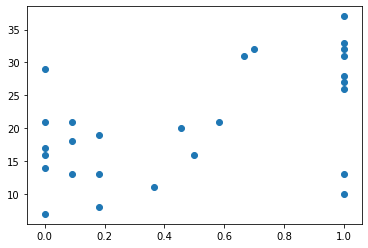

[[ 0.17864737  2.00184534]
 [ 2.00184534 73.94871795]]
Pearsons correlation: 0.551
p value: 0.0029
Reject the null hypothesis that the means are equal.


In [36]:
# prop_choicerej // aq
pyplot.scatter(prop_choicerej, aq)
pyplot.show()
covariance = cov(prop_choicerej, aq)
print(covariance)
corr, _ = pearsonr(prop_choicerej, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [11]:
print(aq)

0     32
1     11
2     21
3      7
4      8
5     14
6     28
7     17
8     31
9     13
10    31
11    19
12    13
13    33
14    16
15    18
16    26
17    10
18    16
19    27
20    21
21    32
22    20
23    21
24    13
25    37
26    29
Name: AQ, dtype: int64


In [15]:
print(prop_choicerej)

1     1.000000
4     0.363636
7     0.090909
10    0.000000
13    0.181818
16    0.000000
19    1.000000
22    0.000000
25    0.666667
28    0.090909
31    1.000000
34    0.181818
37    1.000000
40    1.000000
43    0.500000
46    0.090909
49    0.090909
52    1.000000
55    1.000000
58    0.000000
61    1.000000
64    0.000000
67    0.700000
70    0.454545
73    0.583333
76    0.181818
79    1.000000
82    0.000000
Name: choiceresponse, dtype: float64


In [16]:
#proportion of self-choice in neutral condition
neutralchoice_mean = neutralcondition['choiceresponse'].mean()
neutralchoice_std = neutralcondition['choiceresponse'].std()
print('neutral_by_choice')
print(neutralchoice_mean)
print(neutralchoice_std)

neutral_by_choice
0.38095238096428574
0.4469769119127617


In [17]:
#proportion of self-choice in rejection condition
rejectionchoice_mean = rejectioncondition['choiceresponse'].mean()
rejectionchoice_std = rejectioncondition['choiceresponse'].std()
print('rej_by_choice')
print(rejectionchoice_mean)
print(rejectionchoice_std)

rej_by_choice
0.4706168882142857
0.42138877575306555


In [18]:
#proportion of self-choice in acceptance condition
acceptchoice_mean = acceptcondition['choiceresponse'].mean()
acceptchoice_std = acceptcondition['choiceresponse'].std() 
print('acc_by_choice')                
print(acceptchoice_mean)
print(acceptchoice_std)

acc_by_choice
0.39672619285714283
0.4026641645663256


In [19]:
neutralsalience_mean = neutralcondition['salience'].mean()
neutralsalience_std = neutralcondition['salience'].std()
print('neutralsalience') 
print(neutralsalience_mean)
print(neutralsalience_std)

neutralsalience
2.357142857142857
0.8261595987094033


In [20]:
rejsalience_mean = rejectioncondition['salience'].mean()
rejsalience_std = rejectioncondition['salience'].std()
print('rejectionsalience')
print(rejsalience_mean)
print(rejsalience_std)

rejectionsalience
1.9107142857142858
0.7583311529708756


In [21]:
accsalience_mean = acceptcondition['salience'].mean()
accsalience_std = acceptcondition['salience'].std()
print('accsalience')
print(accsalience_mean)
print(accsalience_std)

accsalience
3.0714285714285716
0.8575836609041332


In [22]:
rejstress_mean = rejectioncondition['stress'].mean()
rejstress_std = rejectioncondition['stress'].std()
print('rejstress')
print(rejstress_mean)
print(rejstress_std)

rejstress
4.071428571428571
2.3082552562579224


In [23]:
accstress_mean = acceptcondition['stress'].mean()
accstress_std = acceptcondition['stress'].std()
print('accstress')
print(accstress_mean)
print(accstress_std)

accstress
3.7857142857142856
2.1535009026155842


In [24]:
#paired samples t-test for condition by choice
t_stat, p_value = ttest_rel(rejectioncondition['choiceresponse'],acceptcondition['choiceresponse'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)


T-statistic value: 2.4177191381211127
P-value: 0.022641174777283144


In [25]:
#%% paired samples t-test for condition by salience
t_stat, p_value = ttest_rel(rejectioncondition['salience'],acceptcondition['salience'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

T-statistic value: -5.595844699670224
P-value: 6.175373288317241e-06


In [26]:
#paired samples t-test for condition by stress
t_stat, p_value = ttest_rel(rejectioncondition['stress'],acceptcondition['stress'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

T-statistic value: 0.9959735240557235
P-value: 0.32810579708454235


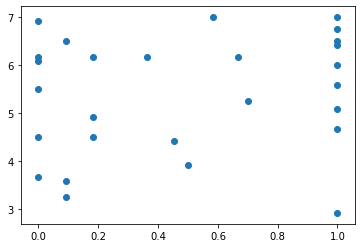

[[0.17864737 0.09532882]
 [0.09532882 1.48814894]]
Pearsons correlation: 0.185
p value: 0.3559
Accept null hypothesis that the means are equal.


In [39]:
# prop_choicerej // mspss
pyplot.scatter(prop_choicerej, mspss)
pyplot.show()
covariance = cov(prop_choicerej, mspss)
print(covariance)
corr, _ = pearsonr(prop_choicerej, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, mspss)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

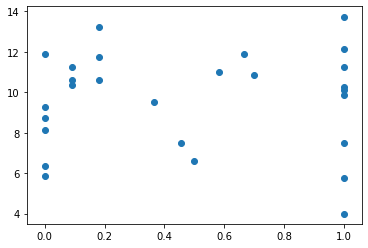

[[1.78647368e-01 3.02463789e-03]
 [3.02463789e-03 5.98188212e+00]]
Pearsons correlation: 0.003
p value: 0.9884
Accept null hypothesis that the means are equal.


In [40]:
# prop_choicerej // rsq
pyplot.scatter(prop_choicerej, rsq)
pyplot.show()
covariance = cov(prop_choicerej, rsq)
print(covariance)
corr, _ = pearsonr(prop_choicerej, rsq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, rsq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

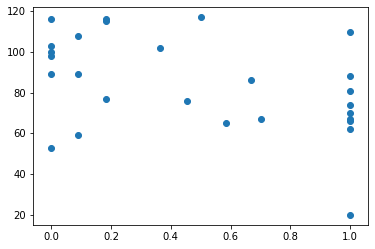

[[ 1.78647368e-01 -4.33090513e+00]
 [-4.33090513e+00  5.53948718e+02]]
Pearsons correlation: -0.435
p value: 0.0232
Reject the null hypothesis that the means are equal.


In [41]:
# prop_choicerej // scs
pyplot.scatter(prop_choicerej, scs)
pyplot.show()
covariance = cov(prop_choicerej, scs)
print(covariance)
corr, _ = pearsonr(prop_choicerej, scs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, scs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

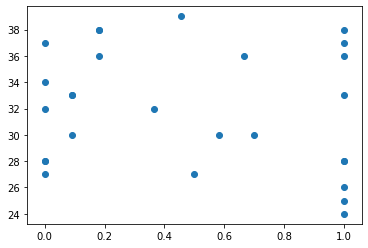

[[ 0.17864737 -0.33940039]
 [-0.33940039 20.65242165]]
Pearsons correlation: -0.177
p value: 0.3780
Accept null hypothesis that the means are equal.


In [42]:
# prop_choicerej // ntbs
pyplot.scatter(prop_choicerej, ntbs)
pyplot.show()
covariance = cov(prop_choicerej, ntbs)
print(covariance)
corr, _ = pearsonr(prop_choicerej, ntbs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, ntbs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

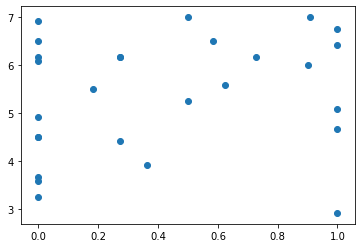

[[0.16209679 0.09940897]
 [0.09940897 1.48814894]]
Pearsons correlation: 0.202
p value: 0.3559
Accept null hypothesis that the means are equal.


In [43]:
# prop_choicerej // mspss
pyplot.scatter(prop_choiceacc, mspss)
pyplot.show()
covariance = cov(prop_choiceacc, mspss)
print(covariance)
corr, _ = pearsonr(prop_choiceacc, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, mspss)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

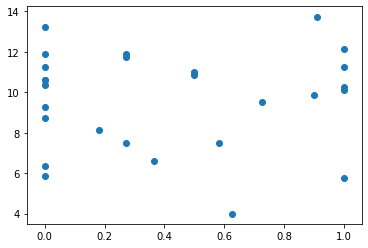

[[0.16209679 0.03705875]
 [0.03705875 5.98188212]]
Pearsons correlation: 0.038
p value: 0.8522
Accept null hypothesis that the means are equal.


In [46]:
# prop_choicerej // rsq
pyplot.scatter(prop_choiceacc, rsq)
pyplot.show()
covariance = cov(prop_choiceacc, rsq)
print(covariance)
corr, _ = pearsonr(prop_choiceacc, rsq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choiceacc, rsq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

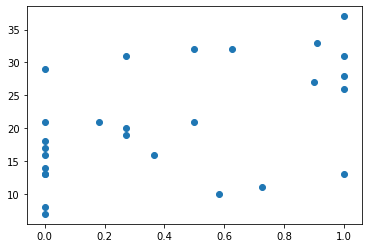

[[ 0.16209679  1.7815333 ]
 [ 1.7815333  73.94871795]]
Pearsons correlation: 0.515
p value: 0.3559
Accept null hypothesis that the means are equal.


In [47]:
# prop_choicerej // aq
pyplot.scatter(prop_choiceacc, aq)
pyplot.show()
covariance = cov(prop_choiceacc, aq)
print(covariance)
corr, _ = pearsonr(prop_choiceacc, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, mspss)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

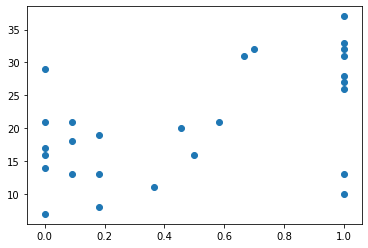

[[ 0.17864737  2.00184534]
 [ 2.00184534 73.94871795]]
Pearsons correlation: 0.551
p value: 0.3559
Accept null hypothesis that the means are equal.


In [48]:
# prop_choicerej // aq
pyplot.scatter(prop_choicerej, aq)
pyplot.show()
covariance = cov(prop_choicerej, aq)
print(covariance)
corr, _ = pearsonr(prop_choicerej, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_choicerej, mspss)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [56]:
acceptancechoiceresponse = acceptcondition['choiceresponse']
rejectionchoiceresponse = rejectioncondition['choiceresponse']

def cohend(acceptancechoiceresponse, rejectionchoiceresponse):
    # calculate the size of samples
    n1, n2 = len(acceptancechoiceresponse), len(rejectionchoiceresponse)
    # calculate the variance of the samples
    s1, s2 = np.var(acceptancechoiceresponse, ddof=26), np.var(rejectionchoiceresponse, ddof=26)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(acceptancechoiceresponse), np.mean(rejectionchoiceresponse)
    # calculate the effect size
    return (u1 - u2) / s

In [57]:
print(acceptancechoiceresponse)
print(rejectionchoiceresponse)

0     0.625000
1     0.727273
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     1.000000
7     0.000000
8     0.272727
9     0.000000
10    1.000000
11    0.272727
12    1.000000
13    0.909091
14    0.363636
15    0.000000
16    1.000000
17    0.583333
18    0.000000
19    0.900000
20    0.181818
21    0.500000
22    0.272727
23    0.500000
24    0.000000
25    1.000000
26    0.000000
Name: choiceresponse, dtype: float64
0     1.000000
1     0.363636
2     0.090909
3     0.000000
4     0.181818
5     0.000000
6     1.000000
7     0.000000
8     0.666667
9     0.090909
10    1.000000
11    0.181818
12    1.000000
13    1.000000
14    0.500000
15    0.090909
16    1.000000
17    1.000000
18    0.000000
19    1.000000
20    0.000000
21    0.700000
22    0.454545
23    0.583333
24    0.181818
25    1.000000
26    0.000000
Name: choiceresponse, dtype: float64


In [58]:
def cohend(acceptancechoiceresponse, rejectionchoiceresponse):
    # calculate the size of samples
    n1, n2 = len(acceptancechoiceresponse), len(rejectionchoiceresponse)
    # calculate the variance of the samples
    s1, s2 = np.var(acceptancechoiceresponse, ddof=26), np.var(rejectionchoiceresponse, ddof=26)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(acceptancechoiceresponse), np.mean(rejectionchoiceresponse)
    # calculate the effect size
    return (u1 - u2) / s

In [59]:
def interpret_cohens_d(cohens_d):
    """
    Determines text interpretation of effect size given Cohen's d value

    :param cohens_d: float of Cohen's d value
    :returns: effect_size_interpretation: adjective to describe magnitude of effect size
    """
    if 0<=cohens_d<0.1:
        effect_size_interpretation = "Very Small"
    elif 0.1<=cohens_d<0.35:
        effect_size_interpretation = "Small"
    elif 0.35<=cohens_d<0.65:
        effect_size_interpretation = "Medium"
    elif 0.65<=cohens_d<0.9:
        effect_size_interpretation = "Large"
    elif cohens_d >= 0.9:
        effect_size_interpretation = "Very Large"
    return effect_size_interpretation


In [61]:
cohens_d = (mean(rejectionchoiceresponse) - mean(acceptancechoiceresponse)) / (sqrt((stdev(rejectionchoiceresponse) ** 2 + stdev(acceptancechoiceresponse) ** 2) / 2))
print(cohens_d)

0.1774884014318516


In [62]:
acceptance_stress = acceptcondition['stress']
rejection_stress = rejectioncondition['stress']

#effect size t-test rej v acc stress level
cohens_d = (mean(rejection_stress) - mean(acceptance_stress)) / (sqrt((stdev(rejection_stress) ** 2 + stdev(acceptance_stress) ** 2) / 2))
print(cohens_d)

0.12294970768292483


In [63]:
acceptance_salience = acceptcondition['salience']
rejection_salience = rejectioncondition['salience']

#effect size t-test rej v acc salience level (likelihood to share in the future)
cohens_d = (mean(rejection_salience) - mean(acceptance_salience)) / (sqrt((stdev(rejection_salience) ** 2 + stdev(acceptance_salience) ** 2) / 2))
print(cohens_d)

-1.395421541355788


In [64]:
#indexing data frame to isolate variables by condition
neutralcondition = updatedchoicedata[updatedchoicedata['condition'] == 0]
rejectioncondition = updatedchoicedata[updatedchoicedata['condition'] == 1]
acceptcondition = updatedchoicedata[updatedchoicedata['condition'] == 2]

#%%

#proportion of self-choice in neutral condition
neutralchoice_mean = neutralcondition['choiceresponse'].mean()
neutralchoice_std = neutralcondition['choiceresponse'].std()
print('neutral_by_choice')
print(neutralchoice_mean)
print(neutralchoice_std)

#%%
#proportion of self-choice in rejection condition
rejectionchoice_mean = rejectioncondition['choiceresponse'].mean()
rejectionchoice_std = rejectioncondition['choiceresponse'].std()
print('rej_by_choice')
print(rejectionchoice_mean)
print(rejectionchoice_std)

#%%
#proportion of self-choice in acceptance condition
acceptchoice_mean = acceptcondition['choiceresponse'].mean()
acceptchoice_std = acceptcondition['choiceresponse'].std() 
print('acc_by_choice')                
print(acceptchoice_mean)
print(acceptchoice_std)

#%%

neutralsalience_mean = neutralcondition['salience'].mean()
neutralsalience_std = neutralcondition['salience'].std()
print('neutralsalience') 
print(neutralsalience_mean)
print(neutralsalience_std)

#%%

rejsalience_mean = rejectioncondition['salience'].mean()
rejsalience_std = rejectioncondition['salience'].std()
print('rejectionsalience')
print(rejsalience_mean)
print(rejsalience_std)

#%%

accsalience_mean = acceptcondition['salience'].mean()
accsalience_std = acceptcondition['salience'].std()
print('accsalience')
print(accsalience_mean)
print(accsalience_std)

#%%

neutralstress_mean = neutralcondition['stress'].mean()
neutralstress_std = neutralcondition['stress'].std()
print('neutralstress')
print(neutralstress_mean)
print(neutralstress_std)

#%%

rejstress_mean = rejectioncondition['stress'].mean()
rejstress_std = rejectioncondition['stress'].std()
print('rejstress')
print(rejstress_mean)
print(rejstress_std)

#%%

accstress_mean = acceptcondition['stress'].mean()
accstress_std = acceptcondition['stress'].std()
print('accstress')
print(accstress_mean)
print(accstress_std)

#%%
#paired samples t-test for condition by choice
t_stat, p_value = ttest_rel(rejectioncondition['choiceresponse'],acceptcondition['choiceresponse'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

#%% paired samples t-test for condition by salience
t_stat, p_value = ttest_rel(rejectioncondition['salience'],acceptcondition['salience'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

#%%
#paired samples t-test for condition by stress
t_stat, p_value = ttest_rel(rejectioncondition['stress'],acceptcondition['stress'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

neutral_by_choice
0.39506172840740744
0.44909250409439755
rej_by_choice
0.48468013962962964
0.4226669710307219
acc_by_choice
0.41141975555555554
0.402612459263603
neutralsalience
2.3333333333333335
0.8320502943378435
rejectionsalience
1.9259259259259258
0.7684112443580198
accsalience
3.074074074074074
0.873803618402192
neutralstress
4.0
2.1838568563966754
rejstress
4.018518518518518
2.334859086019315
accstress
3.740740740740741
2.1810828748863504
T-statistic value: 2.3103901617877423
P-value: 0.029060502774852736
T-statistic value: -5.343727965702275
P-value: 1.3596380084133792e-05
T-statistic value: 0.9334418422816989
P-value: 0.3591802432742933
